# 2. Multivariate Analysis of Exoplanet Properties
### Laboratory of Computational Physics @ Physics of Data, UniPD - 25/06/19
#### Braghetto Anna, Frazzetto Paolo, Schimmenti Vincenzo Maria, Signor Theosamuele
---


## Introduction

An _exoplanet_ is a planet beyond our Solar System. The discovery of exoplantes has skyrocketed in recent years thanks to advanced telescopes and brand-new detecting methods: as of 21 June 2019, there are 4090 confirmed planets in 3049 systems, with more exoplanets confirmed almost every day. Studying the properties of exoplanets and planetary systems not only helps us learn about how these particular systems formed and evolved, but provides essential clues towards understanding whether and where life might exist elsewhere in the Universe.

### Importing the required  R packages

First, we load all the required R packages needed throughout this notebook.

In [0]:
### Install required packages - run only once!

## Select a proper mirror
#mirror = 'http://cran.us.r-project.org'
mirror = 'https://cran.stat.unipd.it/'

install.packages("readr", dependencies=TRUE, INSTALL_opts = c('--no-lock'), repos=mirror)
install.packages('tidyr', repos=mirror)
install.packages('dplyr', repos=mirror)
install.packages("KernSmooth", repos=mirror)
install.packages("kohonen", repos=mirror)
install.packages('igraph', repos=mirror)
install.packages('RANN', repos=mirror)
install.packages('tsne', repos=mirror)
install.packages('Rtsne', repos=mirror)
install.packages('RSpectra', repos=mirror)
install.packages('dimRed', repos=mirror)
install.packages('outliers', repos=mirror)
install.packages('corrplot', repos=mirror)
install.packages('zoo', repos=mirror)
install.packages('diffusionMap', repos=mirror)
install.packages('rgl', repos=mirror)
install.packages('scatterplot3d', repos=mirror)
install.packages("scales", repos=mirror)
install.packages("colorspace", repos=mirror)
install.packages("earth", repos=mirror)
install.packages('kernlab', repos=mirror)

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("RDRToolbox")

In [0]:
### Importing required packages
library(zoo)
library(rgl)
library(tidyr)
library(dplyr)
library(corrplot)
library(KernSmooth)
library(ggplot2)
library(outliers)
library(dimRed)
library(Rtsne)
library(tsne)
library(diffusionMap)
library(RDRToolbox)
library(earth)
library(scatterplot3d)
library(kernlab)
library(scales)


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

corrplot 0.84 loaded
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009
Loading required package: DRR
Loading required package: kernlab

Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha

Loading required package: CVST
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘dimRed’

The following object is masked from ‘package:stats’:

    embed

The following object is masked from ‘package:base’:

    as.data.frame


Attaching package: ‘RDRToolbox’

The following objects are masked from ‘package:dimRed’:

    Isomap, LLE

Loading required p

## a) Load the dataset

Then we load the dataset from [The Extrasolar Planets Encyclopedia](http://exoplanet.eu/catalog.php) as a R dataframe.

In [0]:
# import data directly from the web
dat<-read.csv('http://exoplanet.eu/catalog/csv')
dat<-data.frame(dat)
dat # have a look on some entries and features

X..name                   planet_status mass     mass_error_min
1    11 Com b                  Confirmed     19.40     1.50         
2    11 Oph b                  Confirmed     21.00     3.00         
3    11 UMi b                  Confirmed     10.50     2.47         
4    14 And b                  Confirmed      5.33     0.57         
5    14 Her b                  Confirmed      4.64     0.19         
6    16 Cyg B b                Confirmed      1.68     0.07         
7    18 Del b                  Confirmed     10.30       NA         
8    1RXS 1609 b               Confirmed     14.00     3.00         
9    1RXS J235133.3+312720 b   Confirmed     32.00     6.00         
10   1SWASP J1407 b            Confirmed     20.00     6.00         
11   24 Boo b                  Confirmed      0.91     0.10         
12   24 Sex b                  Confirmed      1.99     0.38         
13   24 Sex c                  Confirmed      0.86     0.22         
14   2M 0103-55 (AB) b         Confirmed     13.00     1.00         
15   2M 0122-24 b              Confirmed     20.00     7.00         
16   2M 0219-39 b              Confirmed     13.90     1.10         
17   2M 0441+23 b              Confirmed      7.50     2.50         
18   2M 0746+20 b              Confirmed     12.21     0.40         
19   2M 1938+46 b              Confirmed      1.90     0.10         
20   2M 2140+16 b              Confirmed     20.00    20.00         
21   2M 2206-20 b              Confirmed     30.00    20.00         
22   2M 2236+4751 b            Confirmed     12.50     1.50         
23   2M J2126-81 b             Confirmed     13.30     1.70         
24   2M0045+16                 Confirmed     25.00     4.60         
25   2M0117-34                 Confirmed     16.40     3.70         
26   2M1207 A                  Confirmed     60.00    20.00         
27   2M1207 b                  Confirmed      5.00     2.00         
28   2MASS J00413538-5621127 A Confirmed     30.00       NA         
29   2MASS J00413538-5621127 B Confirmed     15.00       NA         
30   2MASS J0249-0557 (AB) c   Confirmed     11.60     1.00         
⋮    ⋮                         ⋮             ⋮        ⋮             
4062 gamma Lib b               Confirmed      1.02900 0.08700       
4063 gamma Lib c               Confirmed      4.63000 0.12000       
4064 kappa And b               Confirmed     13.00000 2.00000       
4065 kappa CrB b               Confirmed      1.60000      NA       
4066 kepler-80 g               Confirmed           NA      NA       
4067 ksi Aql b                 Confirmed      2.02000 0.20000       
4068 mu Ara b                  Confirmed      1.67600      NA       
4069 mu Ara c                  Confirmed      0.03321      NA       
4070 mu Ara d                  Confirmed      0.52190      NA       
4071 mu Ara e                  Confirmed      1.81400      NA       
4072 mu Leo b                  Confirmed      2.40000 0.40000       
4073 nu Oph b                  Confirmed     22.20600      NA       
4074 nu Oph c                  Confirmed     24.66200      NA       
4075 ome Ser b                 Confirmed      1.70000      NA       
4076 omi CrB b                 Confirmed      1.50000      NA       
4077 omi UMa b                 Confirmed      4.10000      NA       
4078 pi Men b                  Confirmed      9.66000 0.20000       
4079 pi Men c                  Confirmed      0.01422 0.00255       
4080 sig Per b                 Confirmed      6.50000 1.00000       
4081 tau Boo b                 Confirmed      5.84000 0.55000       
4082 tau Cet e                 Confirmed      0.01240 0.00200       
4083 tau Cet f                 Confirmed      0.01240 0.00431       
4084 tau Cet g                 Confirmed      0.00551 0.00130       
4085 tau Cet h                 Confirmed      0.00576 0.00082       
4086 tau Gem b                 Confirmed     20.60000      NA       
4087 ups And b                 Confirmed      0.62000 0.09000       
408

We inspect the data by observing the dataset dimension and features:

In [0]:
summary(dat) # quick overview of the dataset. Notice that each feature has many NA's

       X..name       planet_status       mass         mass_error_min 
 11 Com b  :   1   Confirmed:4091   Min.   : 0.0000   Min.   :0.000  
 11 Oph b  :   1                    1st Qu.: 0.1072   1st Qu.:0.017  
 11 UMi b  :   1                    Median : 0.9600   Median :0.080  
 14 And b  :   1                    Mean   : 5.1191   Mean   :  Inf  
 14 Her b  :   1                    3rd Qu.: 3.7475   3rd Qu.:0.400  
 16 Cyg B b:   1                    Max.   :81.9000   Max.   :  Inf  
 (Other)   :4085                    NA's   :2173      NA's   :2374   
 mass_error_max     mass_sini       mass_sini_error_min mass_sini_error_max
 Min.   :0.0000   Min.   : 0.0005   Min.   :0.000       Min.   :0.000      
 1st Qu.:0.0123   1st Qu.: 0.1459   1st Qu.:0.013       1st Qu.:0.013      
 Median :0.0740   Median : 1.2050   Median :0.072       Median :0.080      
 Mean   :   Inf   Mean   : 3.6226   Mean   :  Inf       Mean   :  Inf      
 3rd Qu.:0.3400   3rd Qu.: 3.3670   3rd Qu.:0.270       3rd 

In [0]:
cat('Dataset dimension (entires x features):')
dim(dat)

cat('Columns (features):')
colnames(dat)

Dataset dimension (entires x features):

[1] 4091   98

Columns (features):

[1] "X..name"                    "planet_status"             
 [3] "mass"                       "mass_error_min"            
 [5] "mass_error_max"             "mass_sini"                 
 [7] "mass_sini_error_min"        "mass_sini_error_max"       
 [9] "radius"                     "radius_error_min"          
[11] "radius_error_max"           "orbital_period"            
[13] "orbital_period_error_min"   "orbital_period_error_max"  
[15] "semi_major_axis"            "semi_major_axis_error_min" 
[17] "semi_major_axis_error_max"  "eccentricity"              
[19] "eccentricity_error_min"     "eccentricity_error_max"    
[21] "inclination"                "inclination_error_min"     
[23] "inclination_error_max"      "angular_distance"          
[25] "discovered"                 "updated"                   
[27] "omega"                      "omega_error_min"           
[29] "omega_error_max"            "tperi"                     
[31] "tperi_error_min"            "tperi_error_max"           
[33] "tconj"                      "tconj_error_min"           
[35] "tconj_error_max"            "tzero_tr"                  
[37] "tzero_tr_error_min"         "tzero_tr_error_max"        
[39] "tzero_tr_sec"               "tzero_tr_sec_error_min"    
[41] "tzero_tr_sec_error_max"     "lambda_angle"              
[43] "lambda_angle_error_min"     "lambda_angle_error_max"    
[45] "impact_parameter"           "impact_parameter_error_min"
[47] "impact_parameter_error_max" "tzero_vr"                  
[49] "tzero_vr_error_min"         "tzero_vr_error_max"        
[51] "k"                          "k_error_min"               
[53] "k_error_max"                "temp_calculated"           
[55] "temp_calculated_error_min"  "temp_calculated_error_max" 
[57] "temp_measured"              "hot_point_lon"             
[59] "geometric_albedo"           "geometric_albedo_error_min"
[61] "geometric_albedo_error_max" "log_g"                     
[63] "publication"                "detection_type"            
[65] "mass_detection_type"        "radius_detection_type"     
[67] "alternate_names"            "molecules"                 
[69] "star_name"                  "ra"                        
[71] "dec"                        "mag_v"                     
[73] "mag_i"                      "mag_j"                     
[75] "mag_h"                      "mag_k"                     
[77] "star_distance"              "star_distance_error_min"   
[79] "star_distance_error_max"    "star_metallicity"          
[81] "star_metallicity_error_min" "star_metallicity_error_max"
[83] "star_mass"                  "star_mass_error_min"       
[85] "star_mass_error_max"        "star_radius"               
[87] "star_radius_error_min"      "star_radius_error_max"     
[89] "star_sp_type"               "star_age"                  
[91] "star_age_error_min"         "star_age_error_max"        
[93] "star_teff"                  "star_teff_error_min"       
[95] "star_teff_error_max"        "star_detected_disc"        
[97] "star_magnetic_field"        "star_alternate_names"

There are up to 98 different features recorded for each entry, but most of them are not available (NA) values. However, we consider as the most interesting the following ones:
- Mass $[M_{Jup}]$
- Radius $[R_{Jup}]$
- Orbital period $[days]$
- Semi major axis $[AU]$
- Eccentricity 
- Calculated temperature
- Detection method
- Star mass $[M_{Sun}]$
- Star radius $[R_{Sun}]$
- Star metallicity $[Log [(metals/H)star/(metals/H)Sun] ]$
- Star distance $[pc]$
- Star age $[Gy]$
- Effective stellar temperature  

In [0]:
starNames <- dat[,'star_name']
dat <- dat[c('mass', 'radius', 'orbital_period', 'semi_major_axis', 'eccentricity', 'temp_calculated','detection_type', 'star_mass', 'star_radius', 'star_metallicity', 'star_distance',   'star_age','star_teff')]

## b) Univariate analysis

### Mass Distribution

We present the mass distribution of known exoplanets. Various histograms and KDE's are shown for two different discovery methods: _radial velocity_ and _primary transit._

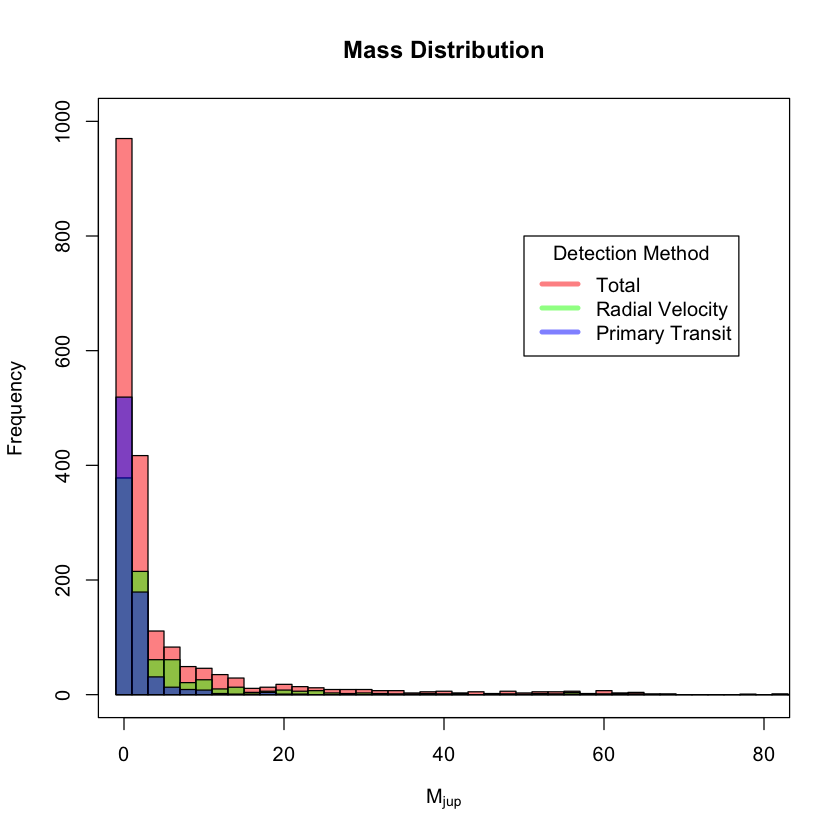

In [0]:
# Plot hist for mass distribution
hist(dat$mass,
     xlab=expression(M[jup]),main='Mass Distribution',breaks=seq(-1,100,2),xlim=c(0,80),col=rgb(1,0,0,1/2), freq=T, ylim=c(0,1000))

Rad.vel <- subset(dat, dat$detection=='Radial Velocity')
hist(Rad.vel$mass,
     xlab=expression(M[jup]),breaks=seq(-1,100,2),add=T,col=rgb(0,1,0,1/2), freq=T)

Prim.transit <- subset(dat, dat$detection=='Primary Transit')
hist(Prim.transit$mass,
     xlab=expression(M[jup]),breaks=seq(-1,100,2),add=T,col=rgb(0,0,1,1/2), freq=T)

legend(50, 800, col=c(rgb(1,0,0,1/2),rgb(0,1,0,1/2), rgb(0,0,1,1/2)),lwd=c(4,4,4), title='Detection Method', 
     	legend=c('Total', 'Radial Velocity','Primary Transit'),)
box()

We observe that only in the first bin the _primary transit_ surpasses the _radial velocity_ detection method. 

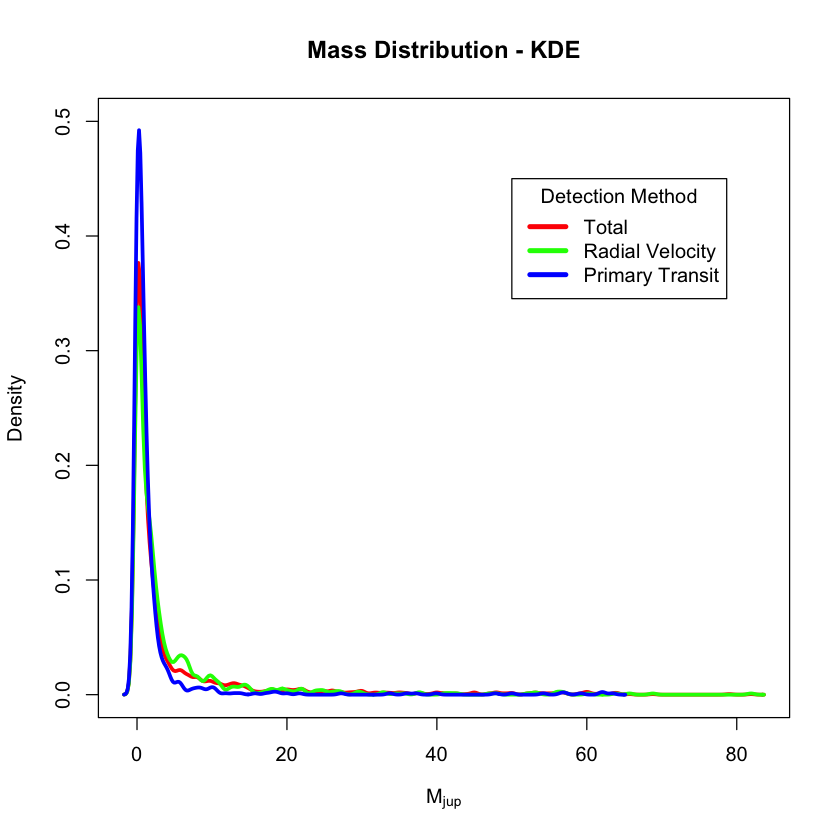

In [0]:
# kernel density estimation KDE

# all methods
#remove NA
TOT <- dat$mass[!is.na(dat$mass)]
# Compute A Binned Kernel Density Estimate, package: KernSmooth. Bandwidth selected with function dpik(X)
kdeTOT <- bkde(TOT, bandwidth = dpik(TOT, scalest = 'stdev', truncate = TRUE)) 
plot(kdeTOT, ylim=c(0,0.5), type='l', col='red', main='Mass Distribution - KDE',xlab=expression(M[jup]), ylab='Density', lwd=3)

# radial velocity method
#remove NA
VEL <- Rad.vel$mass[!is.na(Rad.vel$mass)]
#computing KDE
kdeVEL <- bkde(VEL, bandwidth = dpik(TOT, scalest = 'stdev', truncate = TRUE))
lines(kdeVEL, ylim=c(0,0.5), type='l', col='green', lwd=3)

# primary transit method
#remove NA
PRI <- Prim.transit$mass[!is.na(Prim.transit$mass)]
#computing KDE
kdePRI <- bkde(PRI, bandwidth = dpik(TOT, scalest = 'stdev', truncate = TRUE))
lines(kdePRI, ylim=c(0,0.5), type='l', col='blue', lwd=3)

legend(50, 0.45, col=c('red','green', 'blue'),lwd=c(4,4,4), title='Detection Method', 
     	legend=c('Total', 'Radial Velocity','Primary Transit'),)

We noticed that, as expected, the _radial velocity_ detection method observes more massive exoplanets than _primary transit_, that on the contrary performs better with bigger ones.

## c) Bivariate Analysis

At first, we compute all the pairwise correlations among the features in order to detect the some statistically significant variables for a bivariate analysis.

### Correlation matrix

We plot the correlation matrix of the numerical features.


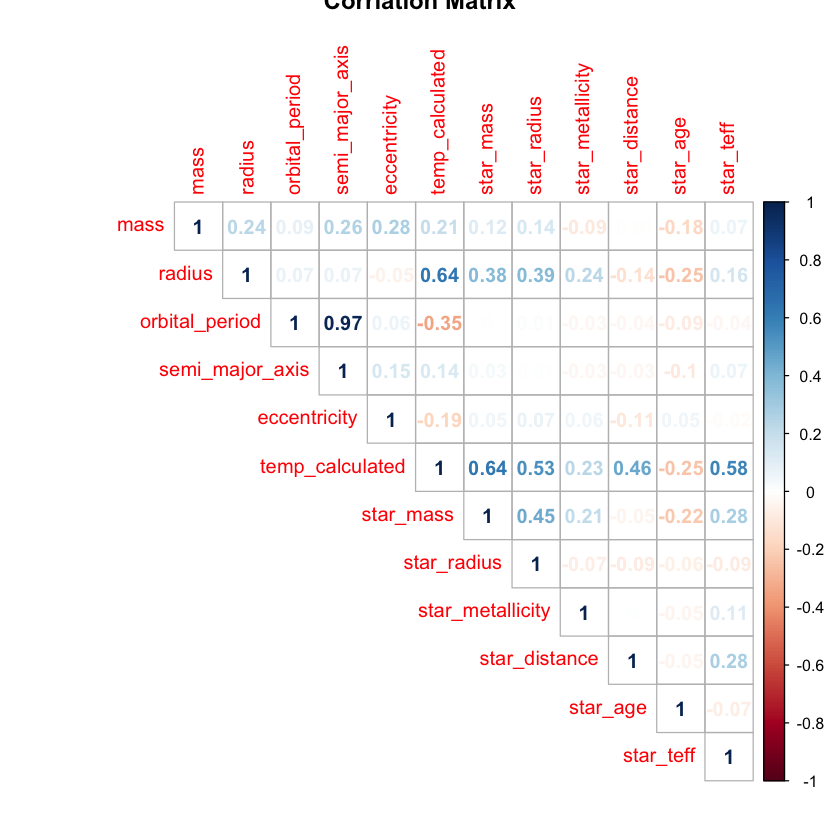

In [0]:
#keep only numerical features (cols)
numeric.columns <- sapply(dat, function(x) {!is.factor(x)})
dat_corr<-dat[,numeric.columns]

#standardize
scaled <- as.data.frame(scale(dat_corr,center=T,scale=T))

#correlation matrix
Corr<-cor(scaled,use='pairwise.complete.obs')

#plot of the correlation matrix
corrplot(Corr, method='number', type='upper', title='Corrlation Matrix') # use package 'corrplot'

Obviously orbital period and semi major axis are highly correlated (Third Kepler's Law), and there is a weak correlation among the _mass_ and other planet's features, that will be investigated below.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“307 y values <= 0 omitted from logarithmic plot”

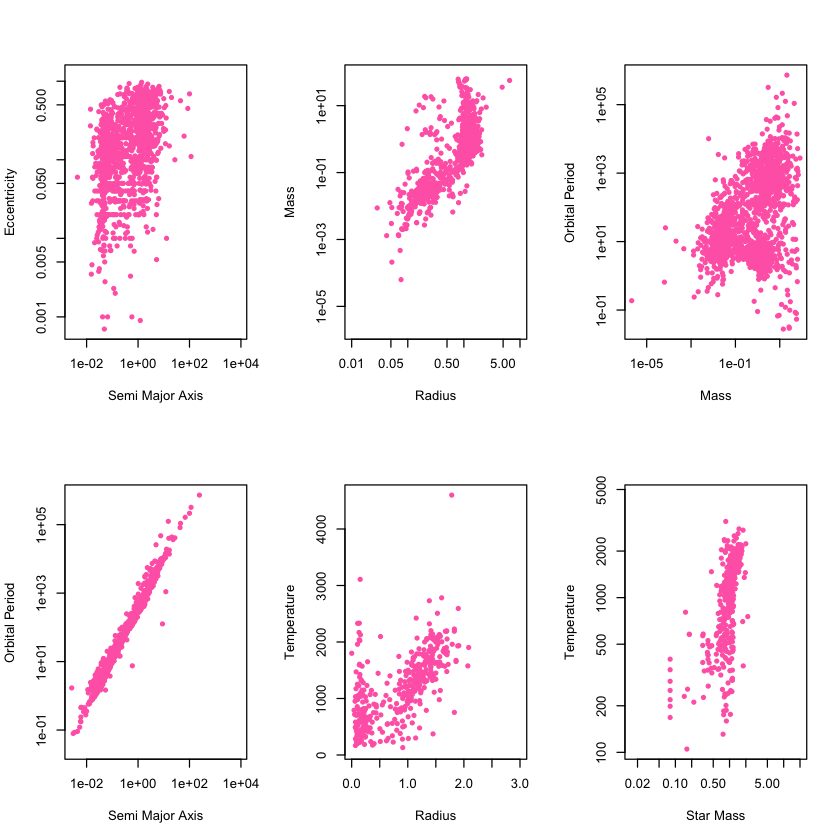

In [0]:
# bivariate analysis, we try with some variable pairs

par(mfrow=c(2,3))
#layout(matrix(c(1,1,1,2,2,2,3,3,3,0,4,4,4,0,5,5,5,0), 2, 9, byrow = TRUE))
plot(dat$semi_major_axis,dat$eccentricity,pch=20,log='xy',col='hotpink', xlab='Semi Major Axis', ylab='Eccentricity')
plot(dat$radius,dat$mass,pch=20,xlim=c(10^-2,10),log='xy',col='hotpink', xlab='Radius', ylab='Mass')
plot(dat$mass,dat$orbital_period,pch=20,log="xy",col='hotpink', xlab='Mass', ylab='Orbital Period')
plot(dat$semi_major_axis, dat$orbital_period,pch=20,log="xy",col='hotpink', xlab='Semi Major Axis', ylab='Orbital Period')
plot(dat$radius,dat$temp_calculated,pch=20,col='hotpink', ylab='Temperature', xlab='Radius', xlim=c(0,3) )
plot(dat$star_mass,dat$temp_calculated,pch=20,log='xy',col='hotpink', ylab='Temperature', xlab='Star Mass' )

Let us discuss some aspects of these plots. In the first one, we noticed that _eccentricity_ and _semi major axis_ are weakly correlated ($0.15$) but interestingly there are not exoplanets with both small values of _eccentricity_ and _semi major axis_. The upper right plot tells us that only more massive exoplanets manifest longer orbital periods, or maybe lighter and faster exoplantes are more difficult to detect. Again in the fourth plot we see the abovementioned high correlation ($0.97$) between _orbital period_ and _Semi Major Axis_. About the fifth plot we could explain, as an educated guess, that the correlation between _radius_ and _temperature_ ($0.64$) due to the fact the bigger the radius the largest surface area we have hence the higher radiation hits he planet. Nevertheless there are other factors that may influence this behavior. Finally, in the last plot we can tell that the measured _star masses_ span a small range, regardless the _temperature_ of the exoplanets which as we said depends mostly on the star-planet distance and other planet properties.

### Mass vs. Radius for Primary transit

We try two different non-parametric regression techniques: _LOESS_ and _spline_. Our analysis is limited to only _primary transit_ discovered exoplanets since other methods cannot measure radii.

Call:
loess(formula = sorty ~ sortx, data = data.frame(x = x, y = y), 
    span = 0.5)

Number of Observations: 769 
Equivalent Number of Parameters: 8.02 
Residual Standard Error: 0.2878 
Trace of smoother matrix: 8.84  (exact)

Control settings:
  span     :  0.5 
  degree   :  2 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE
drop.square:  FALSE 

           Length Class             Mode   
x          606    -none-            numeric
y          606    -none-            numeric
w          606    -none-            numeric
yin        606    -none-            numeric
tol          1    -none-            numeric
data         3    -none-            list   
no.weights   1    -none-            logical
lev        606    -none-            numeric
cv.crit      1    -none-            numeric
pen.crit     1    -none-            numeric
crit         1    -none-            numeric
df           1    -none-            numeric
spar         1    -none-            logical
ratio        1    -none-            logical
lambda       1    -none-            numeric
iparms       5    -none-            numeric
auxM         0    -none-            NULL   
fit          5    smooth.spline.fit list   
call         3    -none-            call   

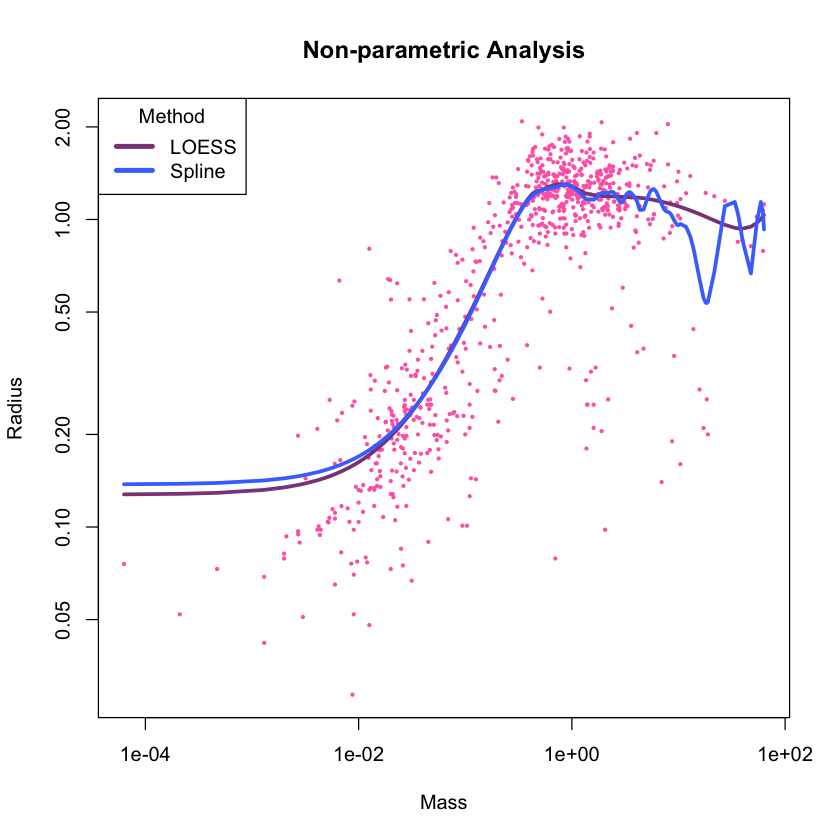

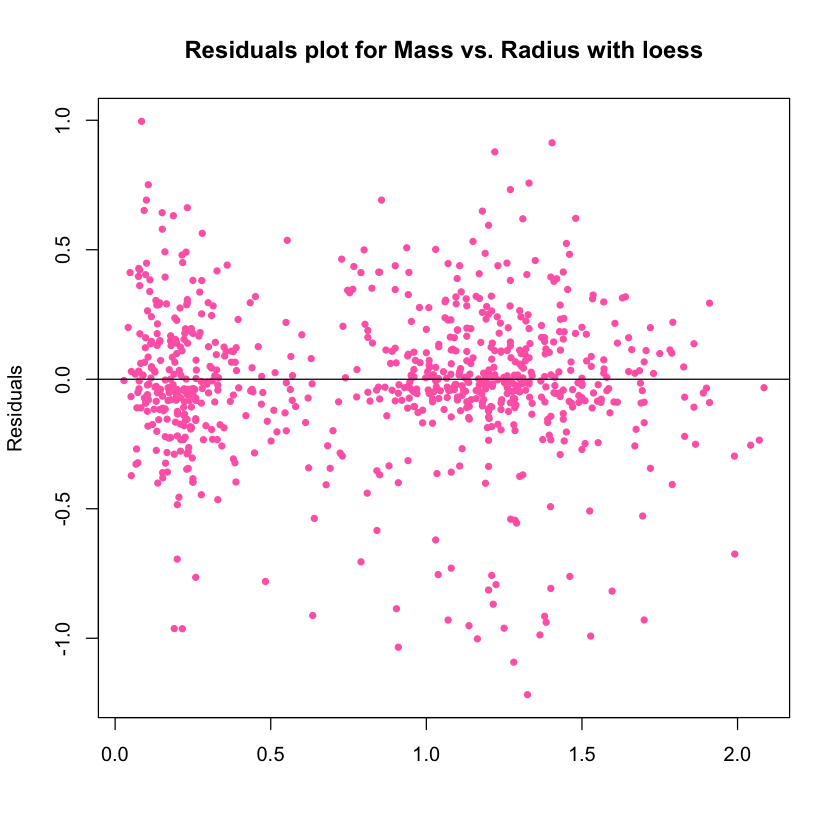

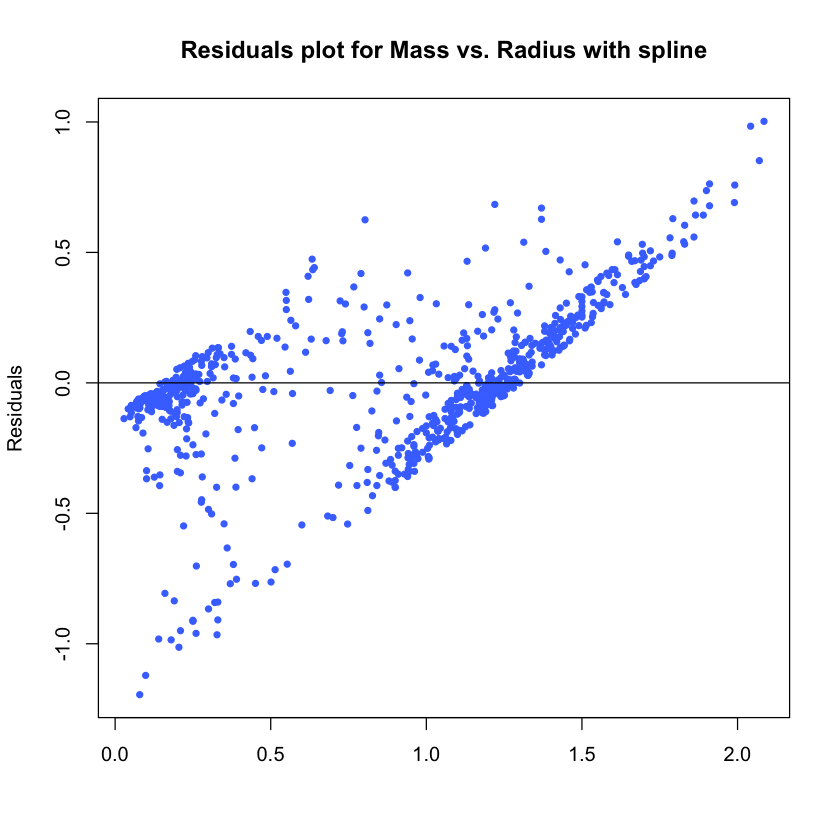

In [0]:
Prim.transit <- subset(dat, dat$detection=='Primary Transit')
Prim.transit <- Prim.transit[!is.na(Prim.transit$radius),]

Prim.transit<-Prim.transit[!is.na(Prim.transit$mass),]

x<-Prim.transit$mass
y<-Prim.transit$radius

# LOESS
sortx <- x[order(x)] ; sorty <- y[order(x)]
local_fit <- loess(sorty ~ sortx, span=0.5, data.frame(x=x,y=y))
summary(local_fit)
plot(x,y,pch=20, cex=0.5, main='Non-parametric Analysis',xlab='Mass',ylab='Radius',col='hotpink',log='xy')
lines(sortx, predict(local_fit), lwd=3, col='orchid4')



#spline
spline <- smooth.spline(cbind(x,y), lambda=10^-7)
summary(spline)
lines(spline, col='royalblue1', lwd=3)

legend("topleft", col=c('orchid4','royalblue1'),lwd=c(4,4), title='Method', legend=c('LOESS', 'Spline'))

Prim.transit.res = resid(local_fit)
plot(y, Prim.transit.res,pch=20, ylab="Residuals", xlab="", 
     main="Residuals plot for Mass vs. Radius with loess",col='hotpink')
abline(0,0)

Prim.transit.sp.res = resid(spline)
plot(y, Prim.transit.sp.res,pch=20, ylab="Residuals", xlab="", 
     main="Residuals plot for Mass vs. Radius with spline",col='royalblue1')
abline(0,0)

Both method provide similar outcomes. There are fewer datapoint for greater masses, and that could explain the wild behavior of the _spline_ method. The way the residuals are distributed for the _LOESS_ fit is roughly normal while the one for the _splines_ have a definite pattern; in the end the _LOESS_ is recommended, both because of better fidelity and residual quality. 

### Orbital period vs. Semi major axis

Call:
loess(formula = sorty ~ sortx, data = data.frame(x = x, y = y), 
    span = 0.5)

Number of Observations: 2408 
Equivalent Number of Parameters: 9.82 
Residual Standard Error: 3056 
Trace of smoother matrix: 10.83  (exact)

Control settings:
  span     :  0.5 
  degree   :  2 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE
drop.square:  FALSE 

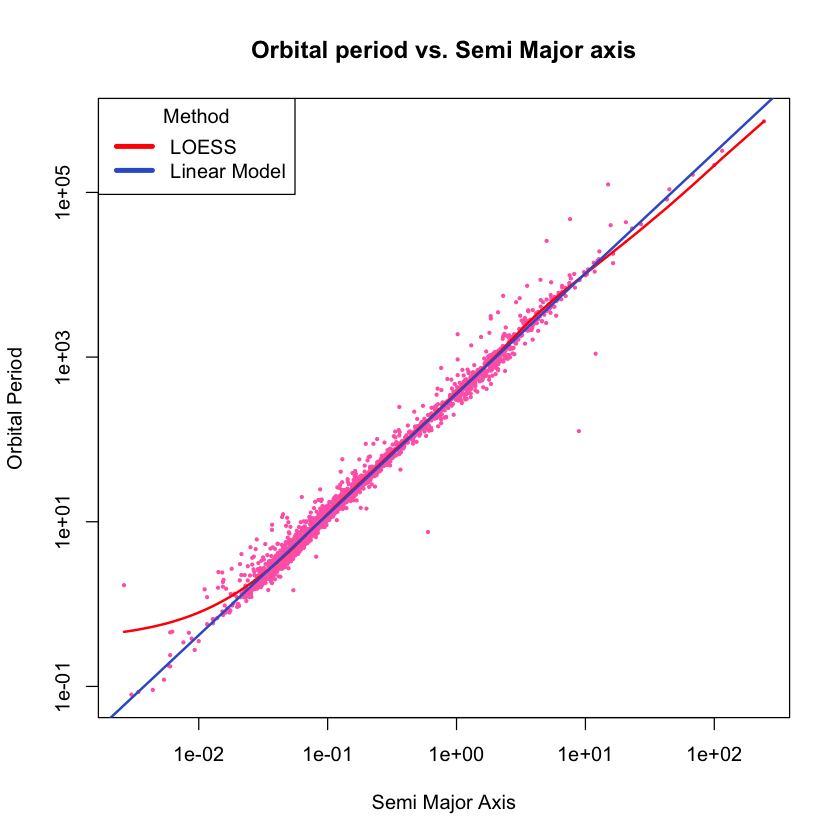

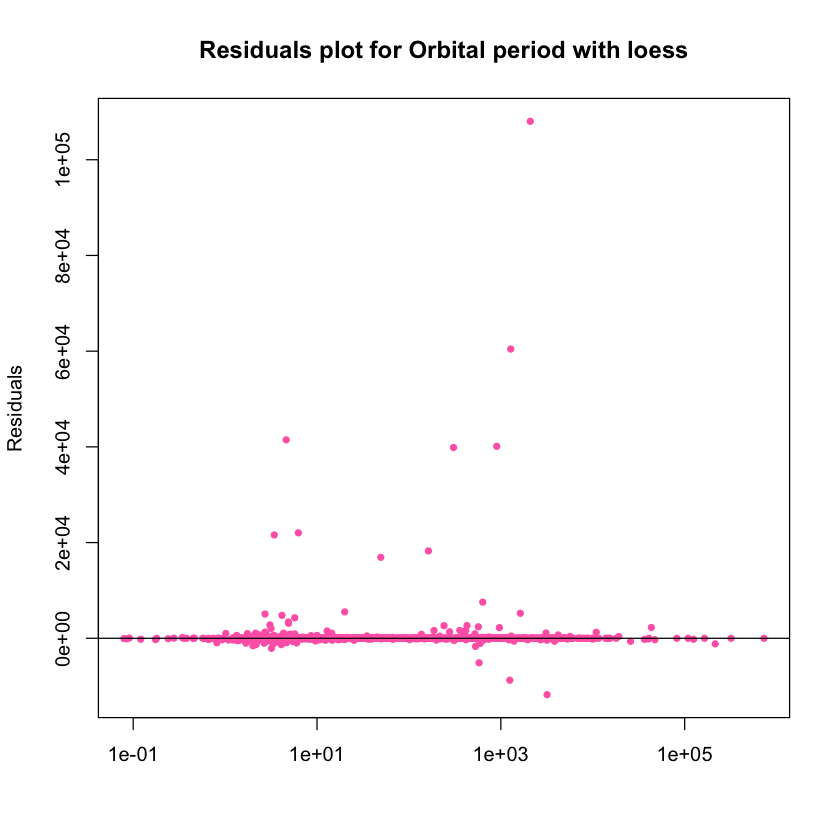

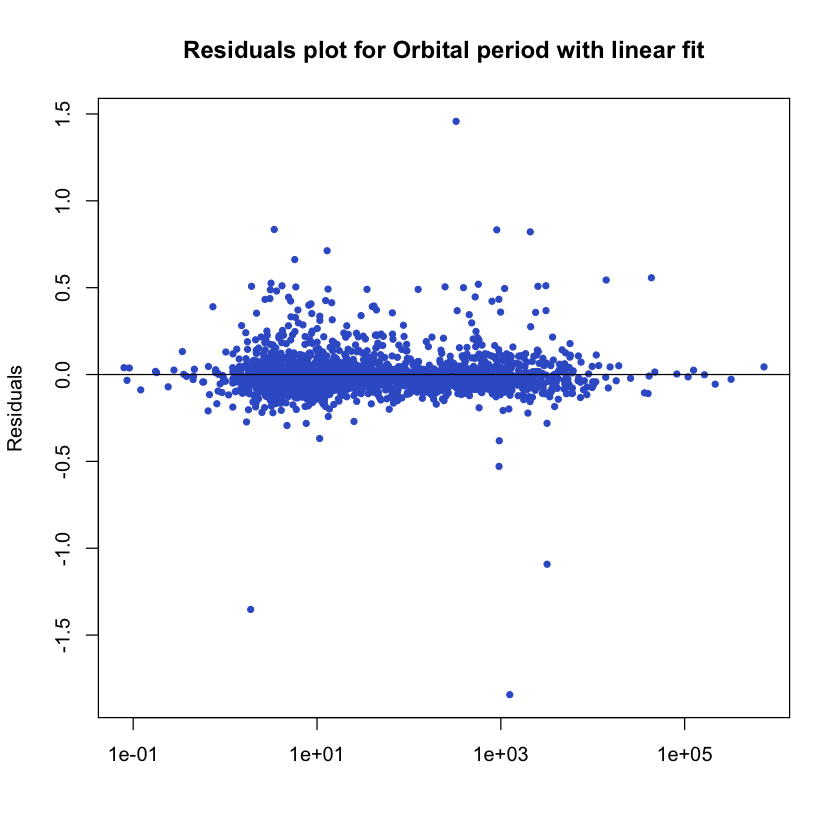

In [0]:
df<-dat[!is.na(dat$orbital_period), ]
df<-df[!is.na(df$semi_major_axis),]

x<-df$semi_major_axis
y<-df$orbital_period


sortx <- x[order(x)] ; sorty <- y[order(x)]
local_fit <- loess(sorty ~ sortx, span=0.5, data.frame(x=x,y=y))
linear_fit <- lm(log10(sorty) ~ log10(sortx))
summary(local_fit)
plot(x,y,pch=20, cex=0.5, main='Orbital period vs. Semi Major axis',xlab='Semi Major Axis',ylab='Orbital Period',
     log='xy',col='hotpink')
lines(sortx, predict(local_fit), lwd=2, col=2)
abline(linear_fit, lwd=2, col='royalblue3')

legend("topleft", col=c(2,'royalblue3'),lwd=c(4,4), title='Method', legend=c('LOESS', 'Linear Model'))


# residual plot
orbital_period.res = resid(local_fit)
plot(y, orbital_period.res,pch=20, ylab="Residuals", xlab="", 
     main="Residuals plot for Orbital period with loess",col='hotpink', log='x')
abline(0,0)

orbital_period.res = resid(linear_fit)
plot(y, orbital_period.res, ylab="Residuals", pch=20, xlab="", 
     main="Residuals plot for Orbital period with linear fit",col='royalblue3', log='x') 
abline(0,0)

Both methods perform very well in both fitting and residual analysis. We used a linear model since we know from theory (_third Kepler's law_) that in the log-log plane the period $T$ and the semi-major axis should be in a linear relationship. The residuals are small in both methods but we find some outliers in the _LOESS_ case.

### Systems with Multiple Planets

In [0]:
Y<-as.integer(as.logical(duplicated(starNames)))

#inspect multiple or single planets
# we added a new binary variable indicator for multiple planets

multi.planet<-dat[Y==1,]
multi.planet$detection_type <- NULL
single.planet<-dat[Y==0,]
single.planet$detection_type <- NULL

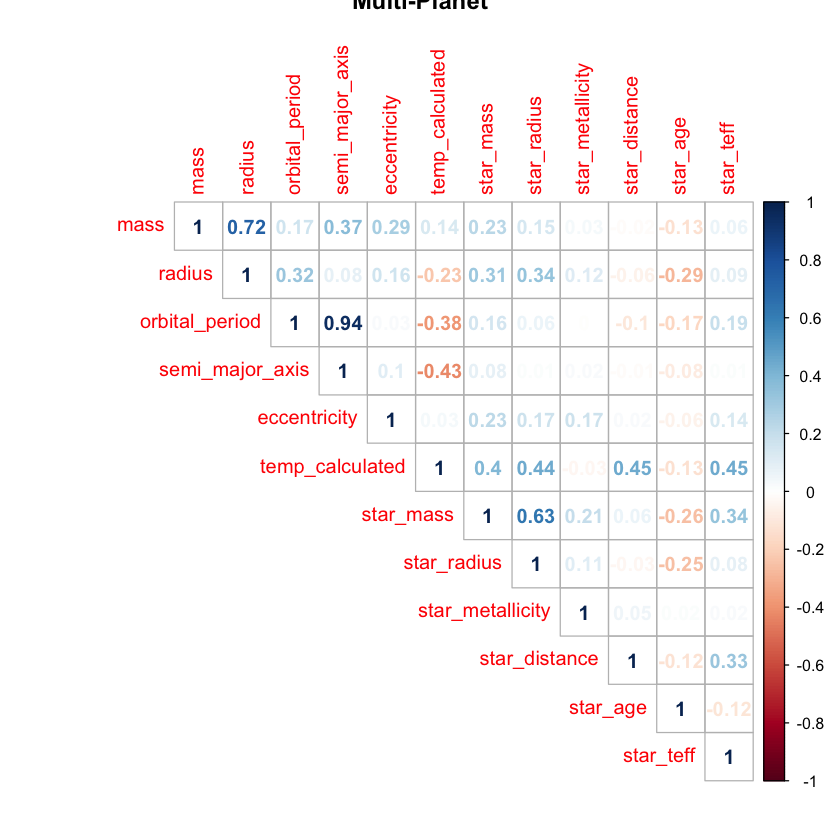

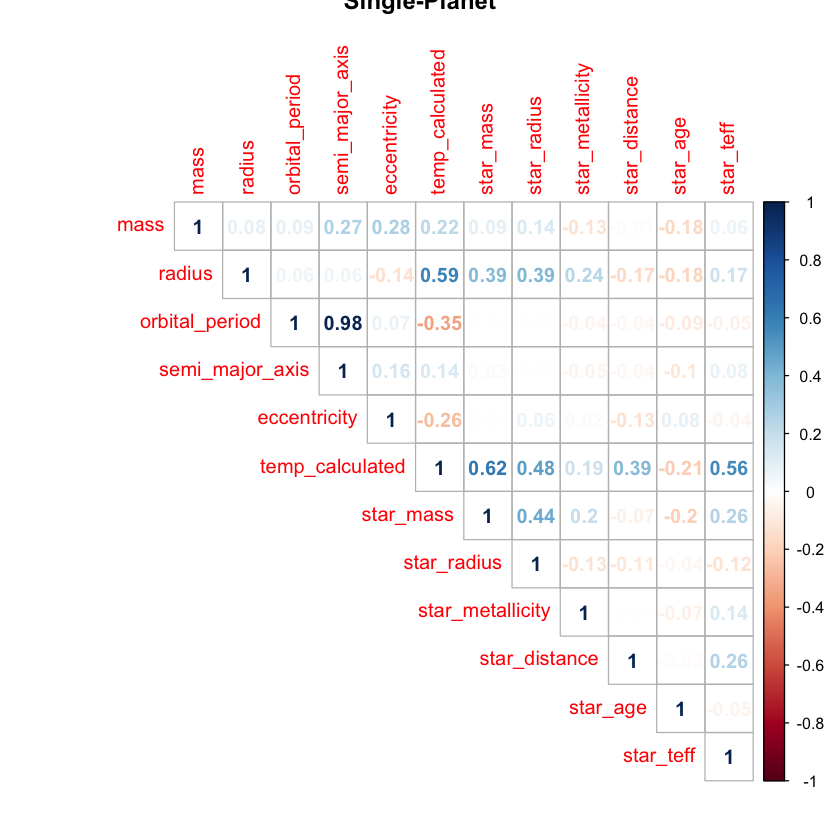

In [0]:
#plot of the correlation matrix
corrplot(cor(multi.planet,use='pairwise.complete.obs'), method='number', type='upper', title='Multi-Planet')
corrplot(cor(single.planet,use='pairwise.complete.obs'), method='number', type='upper', title='Single-Planet')

A first difference between the two type of exoplanets is how much the temperature is correlated to their star features; another maybe more remarkable result is the mass-radius correlation which is really low in the case of single planets: the explanation is not clear but if we instead look at the density histograms one can realize that there is not actual big difference.

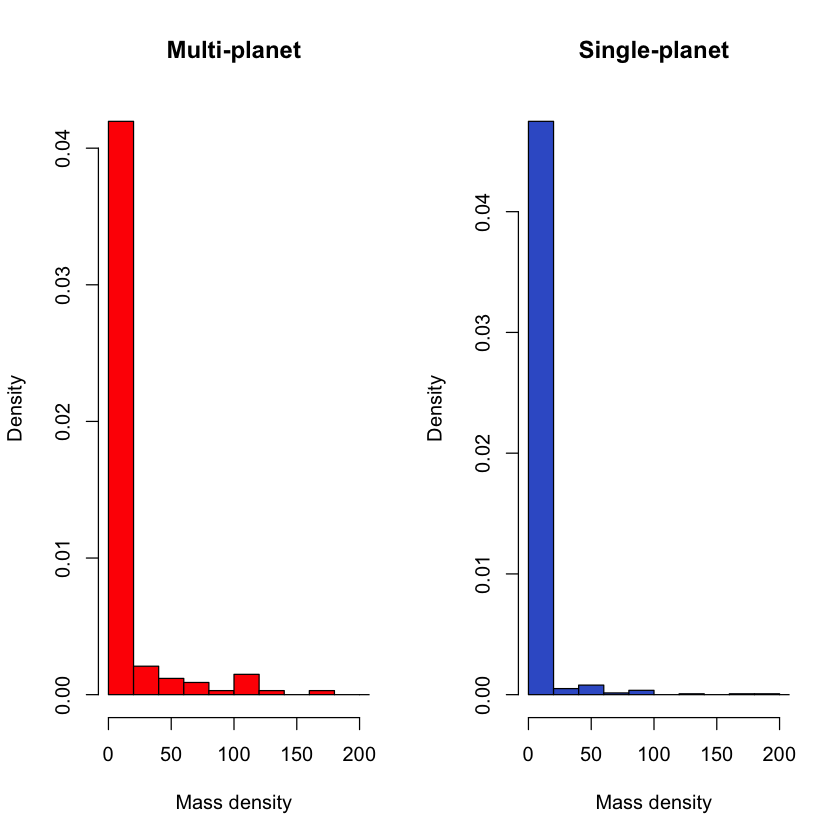

In [0]:
par(mfrow=c(1,2))
hist(multi.planet$mass/multi.planet$radius**3, freq=F, breaks=100, xlim=c(0,200), xlab='Mass density', main='Multi-planet', col=2)
hist(single.planet$mass/single.planet$radius**3, freq=F, breaks=100, xlim=c(0,200), xlab='Mass density', main='Single-planet', col='royalblue3')

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“257 y values <= 0 omitted from logarithmic plot”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“parametro grafico "log" non valido”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“parametro grafico "log" non valido”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“parametro grafico "log" non valido”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“parametro grafico "log" non valido”

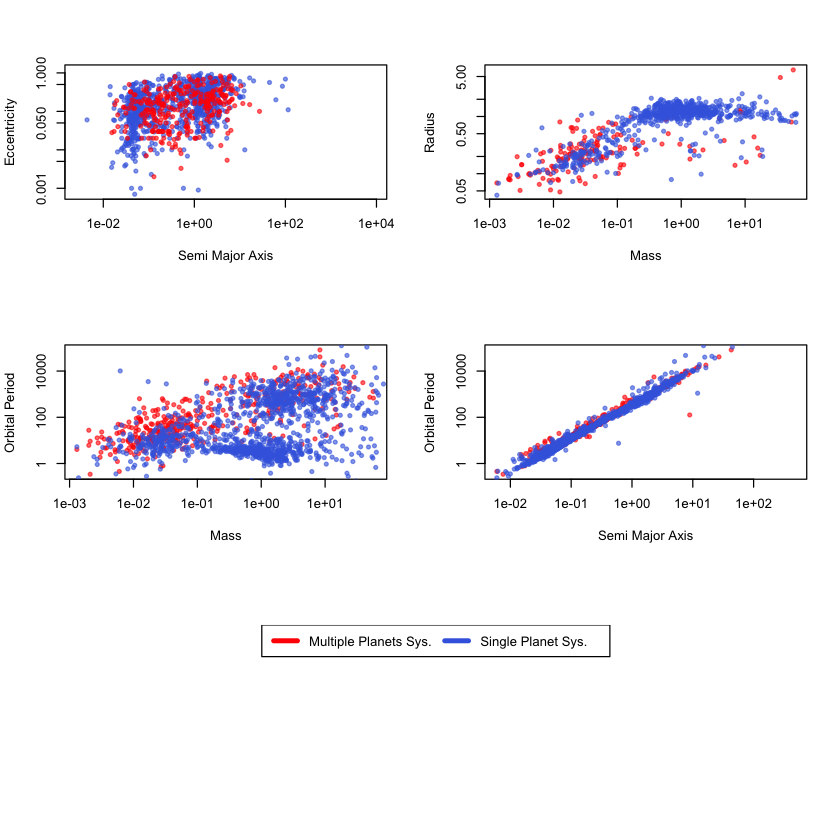

In [0]:
m <- matrix(c(1,2,3,4,5,5),nrow = 3,ncol = 2,byrow = TRUE)
layout(mat = m)

red_c = alpha('red', 0.6)
blue_c = alpha('royalblue', 0.6)

#plot(multi.planet$semi_major_axis, multi.planet$eccentricity,log='xy',col='red', xlab='Semi Major Axis', ylab='Eccentricity')
plot(single.planet$semi_major_axis, single.planet$eccentricity,pch=20,log='xy',col=blue_c, xlab='Semi Major Axis', ylab='Eccentricity')
points(multi.planet$semi_major_axis, multi.planet$eccentricity,pch=20,log='xy',col=red_c, xlab='Semi Major Axis', ylab='Eccentricity')


plot(multi.planet$mass, multi.planet$radius,pch=20,log="xy",col=red_c, xlab='Mass', ylab='Radius')
points(single.planet$mass, single.planet$radius,pch=20,log="xy",col=blue_c, xlab='Mass', ylab='Radius')

plot(multi.planet$mass, multi.planet$orbital_period,pch=20,log="xy",col=red_c, xlab='Mass', ylab='Orbital Period')
points(single.planet$mass, single.planet$orbital_period,pch=20,log="xy",col=blue_c, xlab='Mass', ylab='Orbital Period')

plot(multi.planet$semi_major_axis, multi.planet$orbital_period,pch=20,log="xy",col=red_c, xlab='Semi Major Axis', ylab='Orbital Period')
points(single.planet$semi_major_axis, single.planet$orbital_period,pch=20,log="xy",col=blue_c, xlab='Mass', ylab='Orbital Period')


# dummy plot for legend
plot(0:1,0:1, type = "n", axes=FALSE, xlab="", ylab="")
legend(x = "top",inset = 0, legend = c("Multiple Planets Sys.", "Single Planet Sys."), 
        col=c('red','royalblue'), lwd=4, horiz = TRUE)

The only scatterplot in which we find difference between single and multiple planets is the orbital-mass one; we can identify a sort of _critical stripe_ where we find the multiple system and below which the single planets live. We do not know if this is due a intrinsic physical law or due the low number of data we have.

## d,e) Preparation and Execution of Multivariate Analysis
To tackle the problem of the missing values we first scale our data (i.e. for each feature we remove the mean and divide by the deviation ) and then we set those missing values to 0

In [0]:
# scale variables
dType <- dat[,'detection_type']
X <- dat[dType=='Primary Transit',]
X <- dat[setdiff(colnames(dat), c('detection_type'))]
X <- as.data.frame(scale(X,center=T,scale=T))
X[is.na(X)]=0
X <- as.data.frame(scale(X,center=T,scale=T))

Since for each row there is at least a NaN value we had to substitute these missing value s with something; we decided to first standardize our data computing the mean and the deviations only from not-NaN values; then we imposed all the NaN values to zero, since is the expected value after a data standardization. This procedure lowers the variance and to fix this we scaled our data again.

In [0]:
# function to remove outliers

replace.out <- function(x){
    #20 cycles in order to neglect all the outliers
    for (j in 1:20) {
        for (i in 1:dim(x)[2]) {
            bplot <- boxplot(x[,i],plot=F)
            x[,i][ x[,i] %in% bplot$out ] <- median(as.matrix(x[,i]))
        }
    }
    return(x)
}

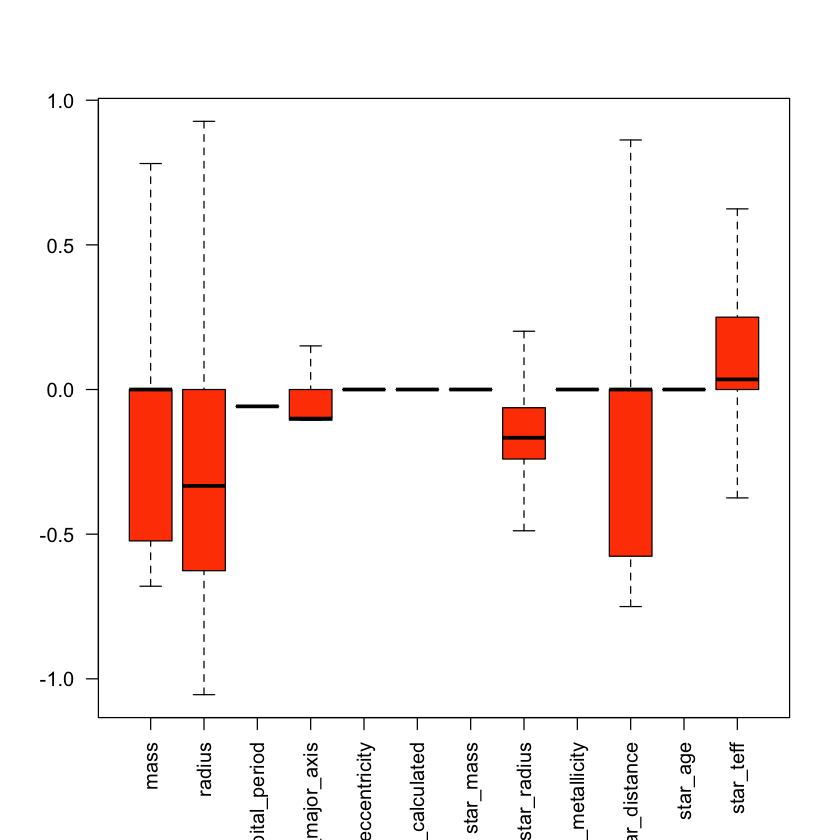

In [0]:
#remove outliers
X <- replace.out(X)
bplot <- boxplot(X, las=2, notch=F,outline=T, col='orangered')

We computed the boxplots and thanks to the fact that they identify the outliers we removed them from our dataset in order to perform a good multivariate analysis. First of all we scaled our data then to remove the outliers we set their value to the median of the whole dataset in order to not lose too much data (thanks to the fact that the median is robust to outliers themselves). This procedure is not properly legimitate in a statistical sense but the same following analysis can be performed using a dataset where the outliers are actually removed and not 'corrected'.

PCA Summary:Standard deviations (1, .., p=12):
 [1] 4.583137e-01 2.807019e-01 2.594291e-01 2.139663e-01 1.001411e-01
 [6] 4.366862e-02 4.253358e-04 1.782953e-18 3.234325e-19 6.719530e-21
[11] 4.006764e-35 0.000000e+00

Rotation (n x k) = (12 x 12):
                           PC1           PC2           PC3           PC4
mass             -0.4037915518  0.3118910117  0.8562917185  6.872550e-02
radius            0.4676418922 -0.7178534067  0.4871160080 -6.824295e-02
orbital_period    0.0001113199 -0.0002121546  0.0004628467  9.031398e-06
semi_major_axis  -0.0534025734  0.0007747885  0.0228929390 -6.127664e-03
eccentricity      0.0000000000  0.0000000000  0.0000000000  0.000000e+00
temp_calculated   0.0000000000  0.0000000000  0.0000000000  0.000000e+00
star_mass         0.0000000000  0.0000000000  0.0000000000  0.000000e+00
star_radius       0.0447260845 -0.1555797497  0.0644959359  2.451414e-01
star_metallicity  0.0000000000  0.0000000000  0.0000000000  0.000000e+00
star_distance    -0.7

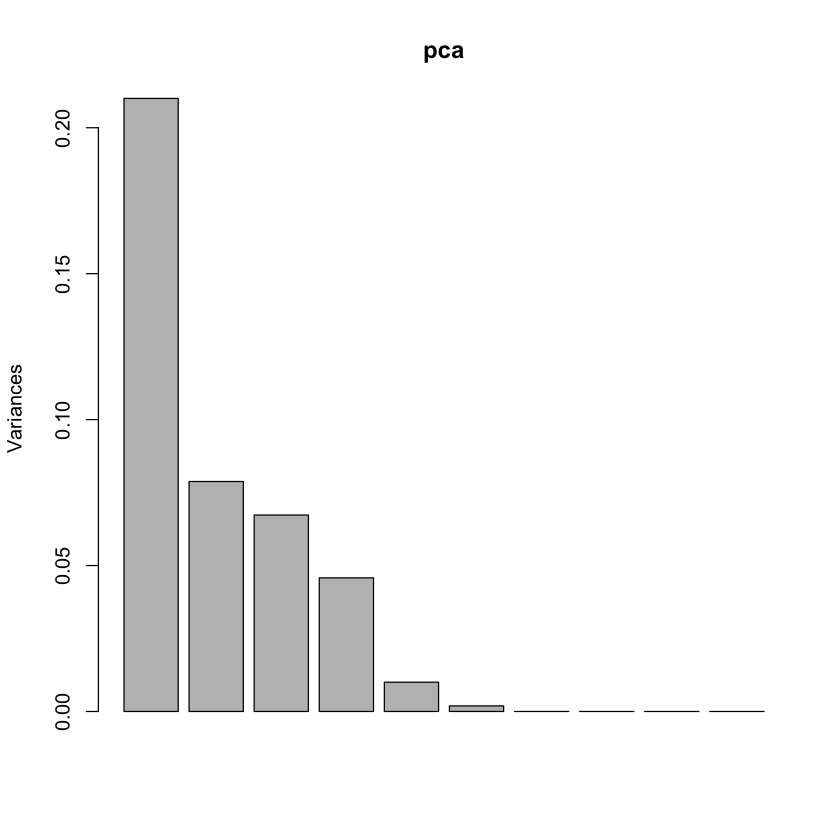

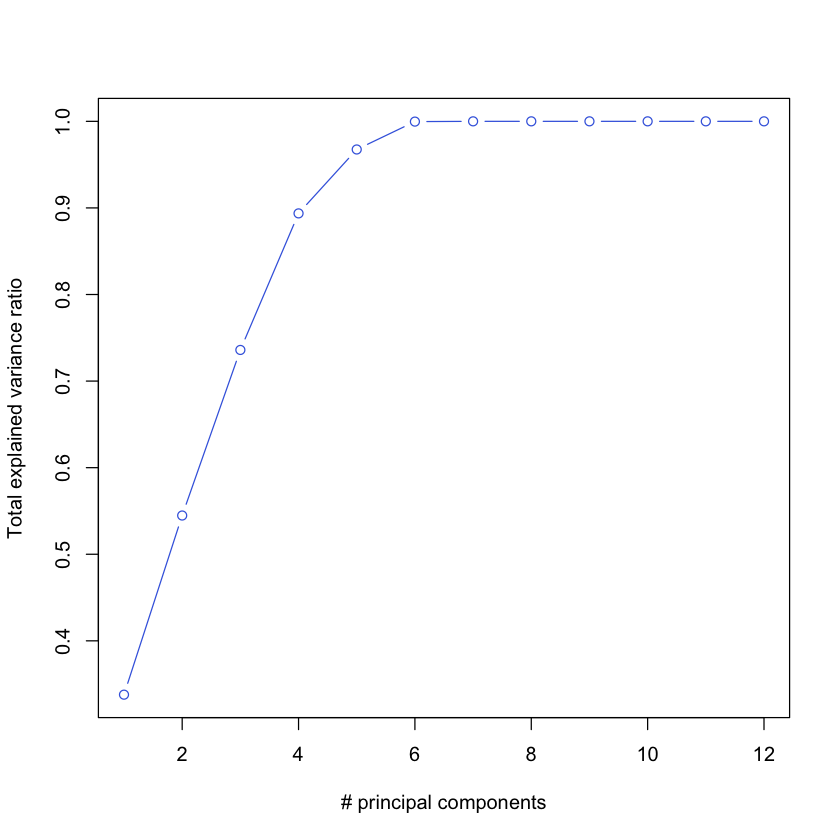

In [0]:
pca <- prcomp(x=X, retx=T)
cat('PCA Summary:')
print(pca)
X_pca <- as.data.frame(pca['x'])
sd_pca <- unlist(pca['sdev'], use.names=F)
sd_pca <- sd_pca/sum(sd_pca)
plot(pca, )
plot(cumsum(sd_pca),type='b', col='royalblue', xlab='# principal components', ylab='Total explained variance ratio')

We have twelve features so we expect that the principal components that matter the most should explain something like $1/12 \approx 8.33 \% $ (which is the uniform importance case) of the whole variance; here the first three components are the most relevant. The first principal one is determined by a combination of the _mass_, the _radius_ and _star distance_ features, which are allegedly among the most important ones.

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”

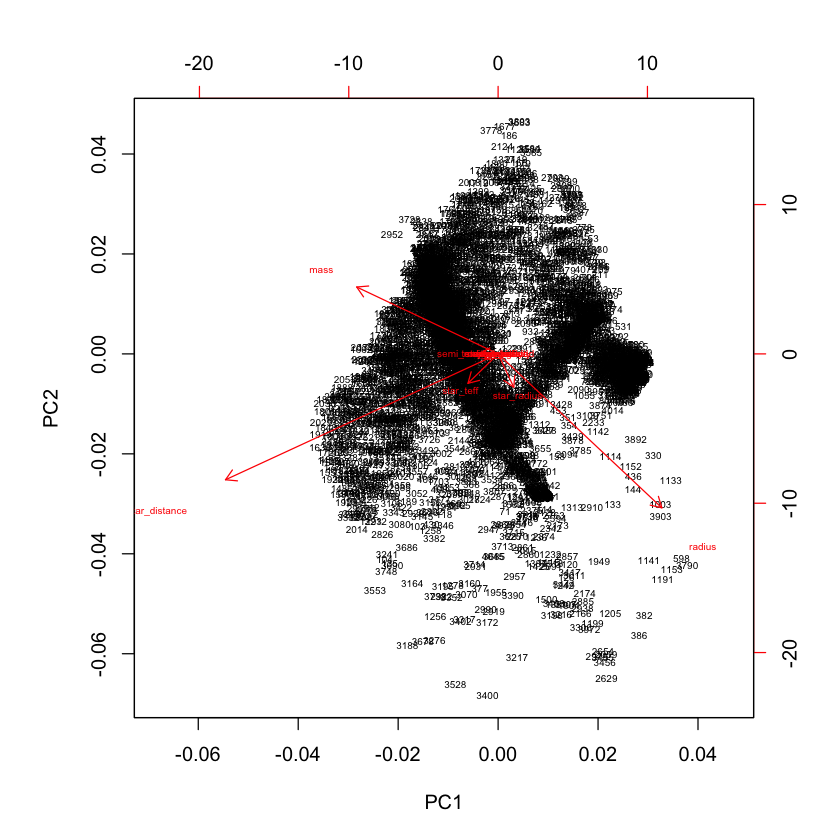

In [0]:
# we also plotted a biplot of the first two Principal Components
biplot(pca, cex = 0.5)

## f) Machine Learning
Here we tried different unsupervised machine learning approaches to infer some structure and information from our data.

### Self-organizing Map (SOM)

Loading required package: kohonen
Loading required package: RColorBrewer


SOM of size 4x4 with a rectangular topology and a bubble neighbourhood function.
The number of data layers is 1.
Distance measure(s) used: sumofsquares.
Training data included: 4091 objects.
Mean distance to the closest unit in the map: 0.076.


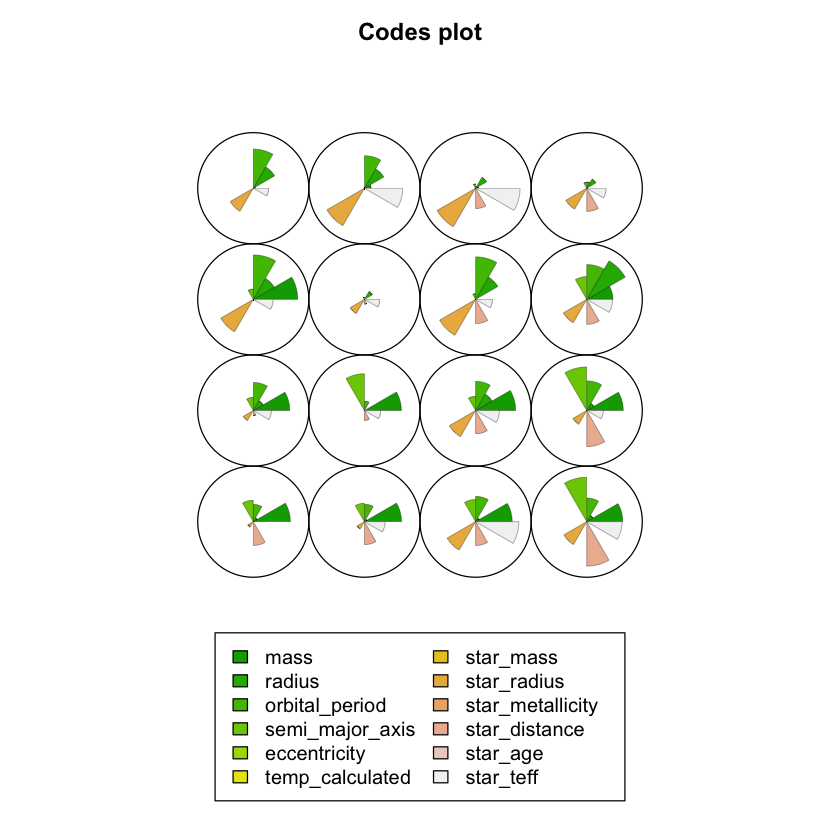

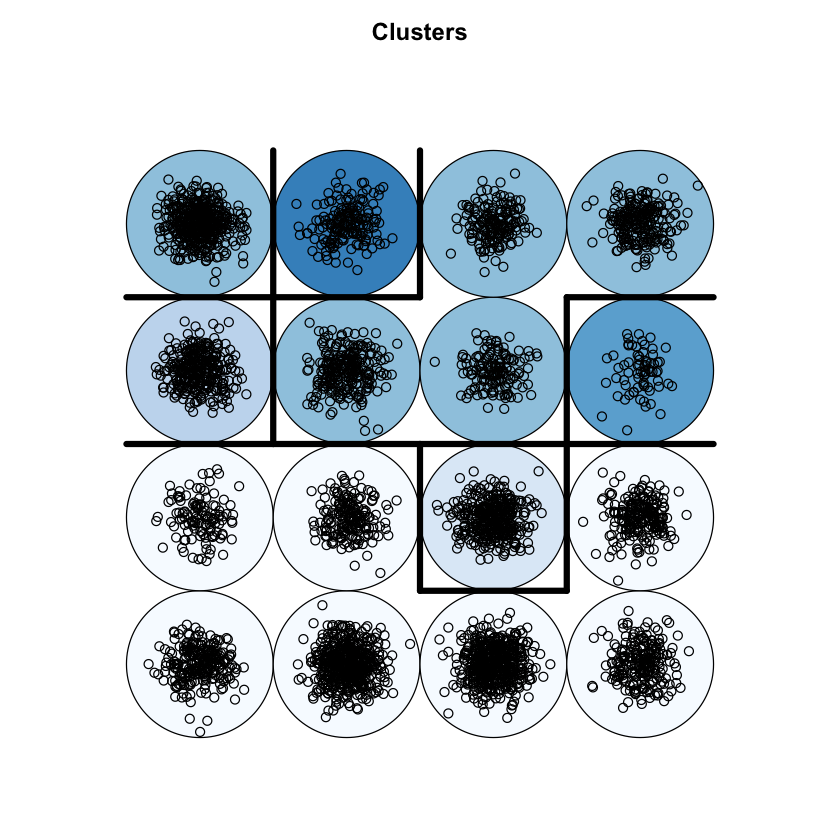

In [0]:
# Self-organizing Map (SOM)
require(kohonen)
require(RColorBrewer)

xdim = 4
ydim = 4
total_dim = xdim*ydim

som_grid <- somgrid(xdim , ydim, topo="rectangular")
som_model <- som(as.matrix(X) , grid = som_grid)

summary(som_model)
plot(som_model)

som_cluster <- cutree(hclust(dist(unlist(som_model$codes))), total_dim)
plot(som_model, type="mapping", bgcol = brewer.pal(9,"Blues")[som_cluster], main = "Clusters") 
add.cluster.boundaries(som_model, som_cluster)

### Isomap

Isomap is a nonlinear dimension reduction method which preserves global properties of the data. 

In [0]:
#convert the data frame into a matrix
X.mat <- data.matrix(X,rownames.force = NA) 
head(X.mat)

mass          radius        orbital_period semi_major_axis eccentricity
[1,] -1.043394e-17 -2.364344e-17 -0.058243      -0.10047488     2.28193e-17 
[2,] -1.043394e-17 -2.364344e-17 -0.058243      -0.10051646     2.28193e-17 
[3,]  7.147262e-01 -2.364344e-17 -0.058243      -0.09943518     2.28193e-17 
[4,]  2.801093e-02 -2.364344e-17 -0.058243      -0.10238792     2.28193e-17 
[5,] -6.363965e-02 -2.364344e-17 -0.058243      -0.09431986     2.28193e-17 
[6,] -4.568074e-01 -2.364344e-17 -0.058243      -0.09885295     2.28193e-17 
     temp_calculated star_mass     star_radius   star_metallicity star_distance
[1,] -3.496806e-18   -1.058079e-16 -1.666794e-01 -1.592926e-17    -0.6160468   
[2,] -3.496806e-18   -1.058079e-16 -5.679611e-18 -1.592926e-17    -0.5738139   
[3,] -3.496806e-18   -1.058079e-16 -1.666794e-01 -1.592926e-17    -0.6051203   
[4,] -3.496806e-18   -1.058079e-16 -1.666794e-01 -1.592926e-17    -0.6580342   
[5,] -3.496806e-18   -1.058079e-16 -2.811392e-01 -1.592926e-17    -0.7296091   
[6,] -3.496806e-18   -1.058079e-16 -1.901068e-01 -1.592926e-17    -0.7255454   
     star_age      star_teff  
[1,] -6.753074e-17  0.03494142
[2,] -6.753074e-17  0.03494142
[3,] -6.753074e-17  0.03494142
[4,] -6.753074e-17  0.03494142
[5,] -6.753074e-17 -0.12647020
[6,] -6.753074e-17  0.19706411

We apply Isomap to the dataset in order to reduce its dimensionality. In order to look for the best number of dimensions, we consider all the possibilities: from 1 (smallest) to 12 (original).

Computing distance matrix ... done
Building graph with shortest paths (using 10 nearest neighbours) ... done
Computing low dimensional embedding ... Warning message in sqrt(d):
“Si è prodotto un NaN”Warning message in sqrt(d):
“Si è prodotto un NaN”Warning message in sqrt(d):
“Si è prodotto un NaN”Warning message in sqrt(d):
“Si è prodotto un NaN”Warning message in sqrt(d):
“Si è prodotto un NaN”Warning message in sqrt(d):
“Si è prodotto un NaN”Warning message in sqrt(d):
“Si è prodotto un NaN”Warning message in sqrt(d):
“Si è prodotto un NaN”Warning message in sqrt(d):
“Si è prodotto un NaN”Warning message in sqrt(d):
“Si è prodotto un NaN”Warning message in sqrt(d):
“Si è prodotto un NaN”Warning message in sqrt(d):
“Si è prodotto un NaN”done
number of samples: 4091
reduction from 12 to 123456789101112 dimensions
number of connected components in graph: 1


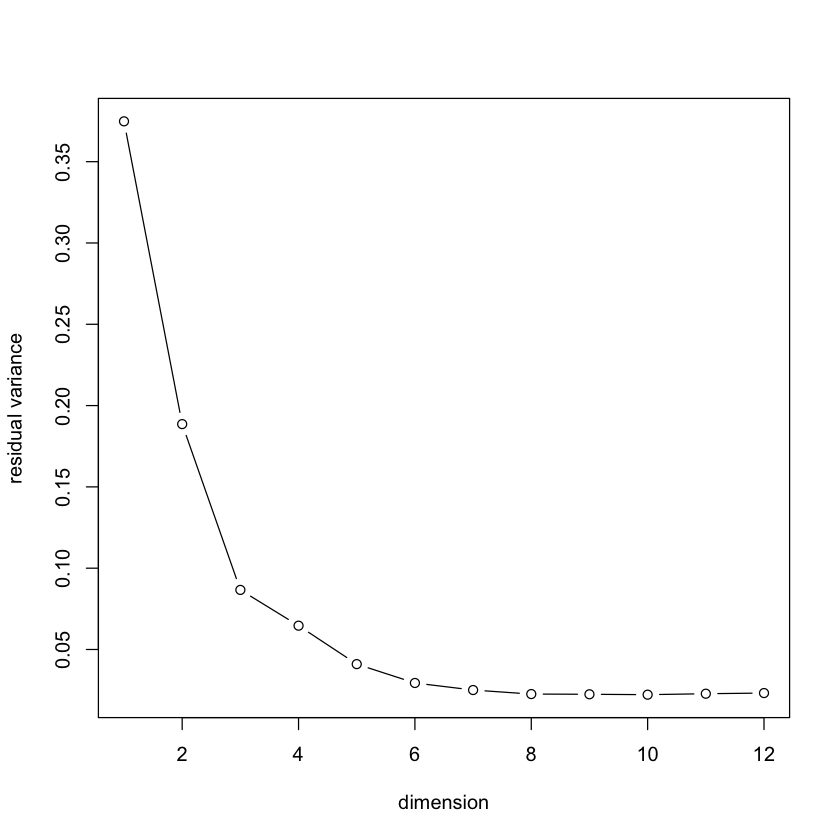

In [0]:
#apply isomap with different dimensions, package: RDRToolbox
Isomap.out <- Isomap(data=X.mat, dims=1:12, k=10, plotResiduals=TRUE)

As shown in the graph above, the error slope changes near the 3-rd dimension reduction: reduce to a larger size does not lead to a clear decrease of the error. This reason leades us to choose 3 as the best dimension number to reduce the data.

The plots for 3 and 2 dimensions are shown below.

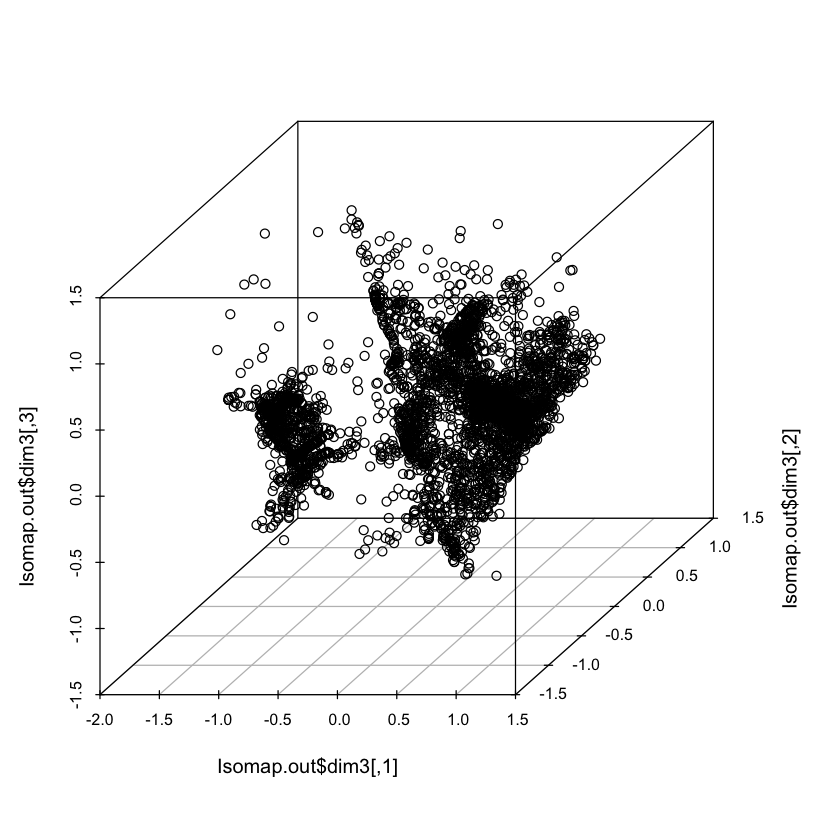

In [0]:
#plot 3dim
scatterplot3d(Isomap.out$dim3)

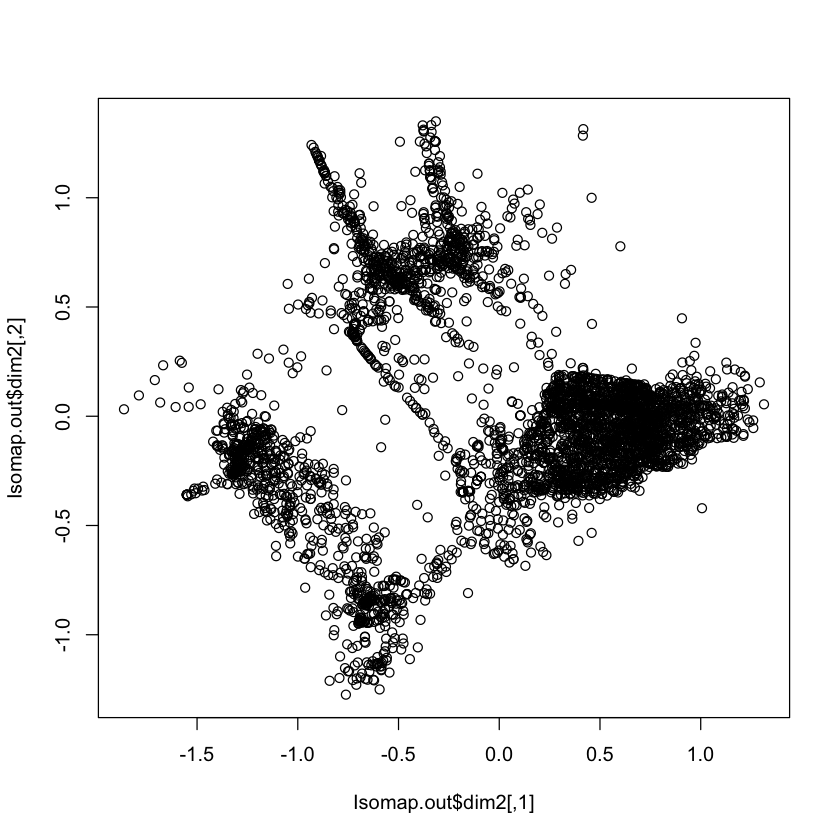

In [0]:
#plot 2 dim
plot(Isomap.out$dim2)

### Diffusion Maps

Diffusion Maps performs data parametrization exploiting the natural geometry of the data set: it builds a global representation of the data by computing and, then propagating to larger scale, local interactions among points.

The method _diffuse_, from the package _DiffusionMaps_ has 2 inner functions (_print_ and _plot_) that show the results of the data parametrization. In order to visualize the results, the diffusion coordinates are shown in 1,2 or 3 dimensions. 

Performing eigendecomposition
Computing Diffusion Coordinates
Used default value: 10 dimensions
Elapsed time: 9.724 seconds
$eigenmult
 [1] 0.83651694 0.23840275 0.20723499 0.14293942 0.14010447 0.07801315
 [7] 0.06370144 0.05349359 0.05125678 0.03668122

$epsilon
[1] 0.7



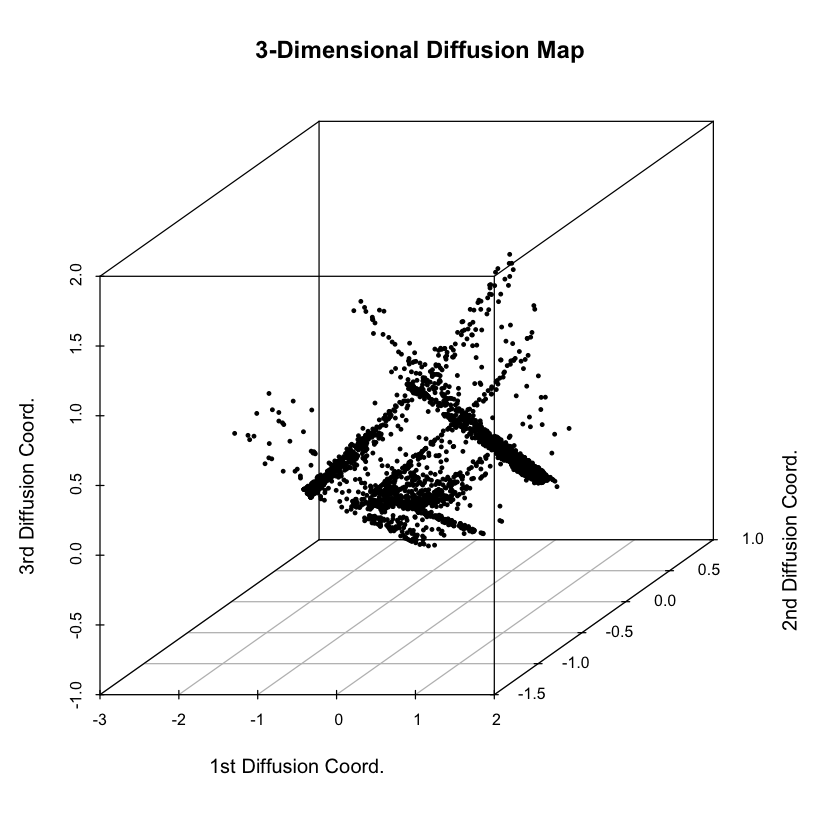

In [0]:
#distance matrix
D <- as.matrix(dist(X))

dmap.out <- diffuse(D, eps.val=0.7)
print(dmap.out)
plot(dmap.out)

### Stochastic Neighborhood Embedding

In [0]:
tsne.out <- Rtsne(X, dims=3, perplexity=100, check_duplicates=F )

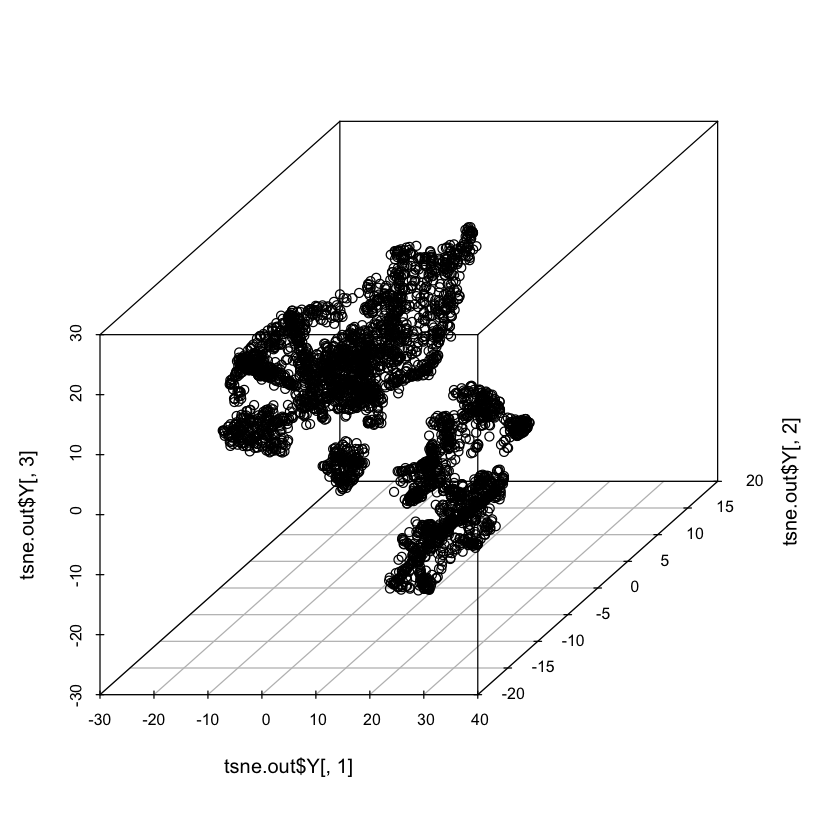

In [0]:
#plot in 3 dim
scatterplot3d(tsne.out$Y[,1],tsne.out$Y[,2],tsne.out$Y[,3])

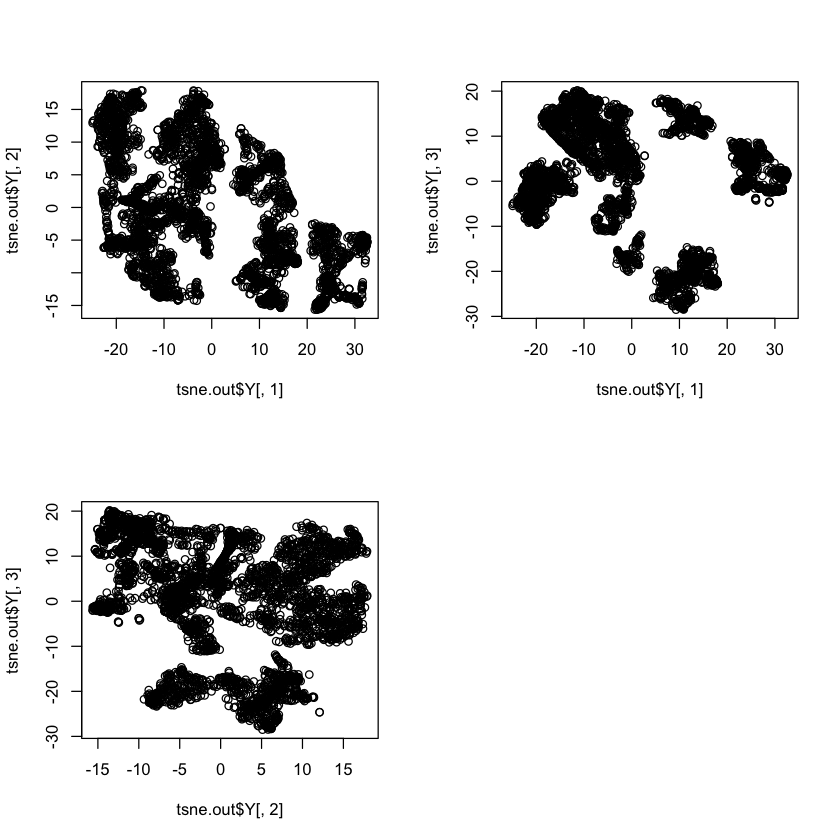

In [0]:
par(mfrow=c(2,2))
plot(tsne.out$Y[,1],tsne.out$Y[,2])
plot(tsne.out$Y[,1],tsne.out$Y[,3])
plot(tsne.out$Y[,2],tsne.out$Y[,3])

### Autoencoder
An autoencoder is a neural network that tries to learn the internel representation of features. It is constructed by an input layer with, a certain number of internal layers and an output layer as big as the input one. The loss function tries to return an output similar to the input (i.e. $L(x,x')=|x-x'|^2$). If one uses a single hidden layer there is a straightforward interpretation: the values that this hidden layer outputs is the compressed version of the input; if one manages to minimized the error a lot with fewer nodes in this hidden layer one has actually performed a dimensonality reduction, especially if the new features are independent among themselves. below we apply this procedure to our dataset keeping two dimensions.

In [0]:
library(ANN2)

In [0]:
newDim <- 2 # bottleneck layer
train_ind <- sample(dim(X)[1])
X_train <- X.mat[train_ind,]
X_test <- X.mat[-train_ind,]

In [0]:
aeNN <- autoencoder(X=X_train, hidden.layers=c(newDim), random.seed=1204565)

Artificial Neural Network: 
  Layer - 12 nodes - input 
  Layer - 2 nodes - tanh 
  Layer - 12 nodes - linear 
With squared loss and SGD optimizer 
Training progress:
[++++++++++++++++++++++++++++++++++++++++++++++++++] 100% - Validation loss: 2.94706


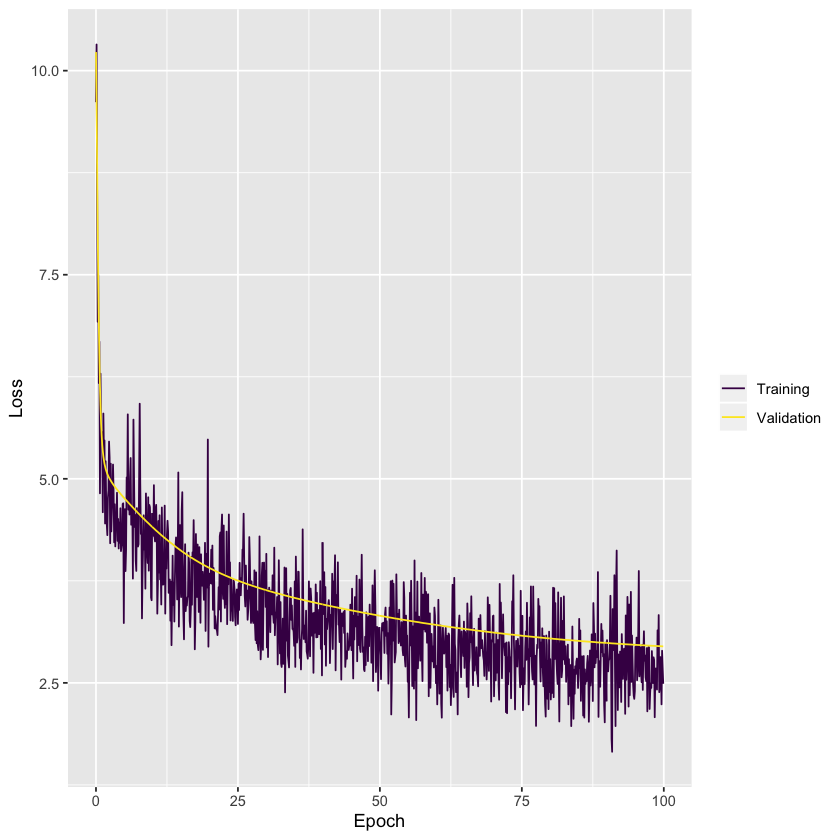

In [0]:
plot(aeNN)

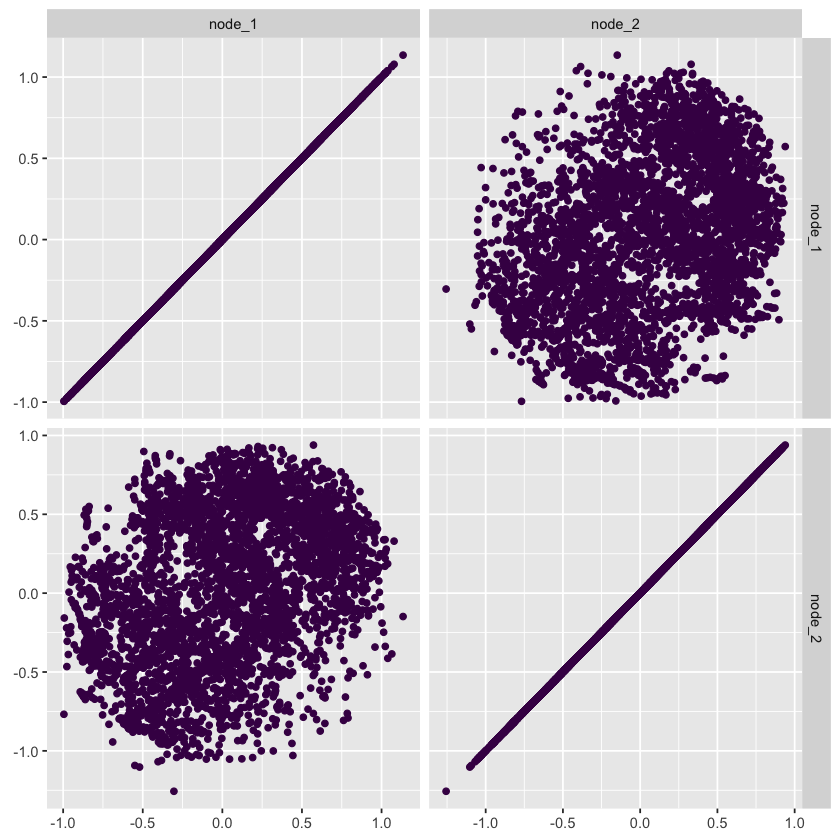

In [0]:
compression_plot(aeNN, X)

In [0]:
rec_train <- reconstruct(aeNN, X_train)
rec_test <- reconstruct(aeNN, X_test)

## g) Conclusions

We found analyzing this dataset very instructive, especially because we had to deal with a lot of missing values, many features, different statistical approaches and a lot of packages, like in a real-world setting. Many things can be further improved and since a new data comes out almost daily after some time we can have a real grasp of how the exoplanets are characterized.